In [1]:
import numpy as np
from statsmodels.tsa.tsatools import lagmat
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
yahoo=pd.read_csv('2008-01-02-YHOO.OQ-bbo.csv',index_col=0)
yahoo.index=pd.DatetimeIndex(yahoo.index)

msft=pd.read_csv('2008-01-02-MSFT.O-bbo.csv',index_col=0)
msft.index=pd.DatetimeIndex(msft.index)

In [33]:

yahoo['ar']=yahoo['ask-price'].diff()
yahoo['br']=yahoo['bid-price'].diff()
yahoo.dropna(inplace=True)
yahoo.index=pd.DatetimeIndex(yahoo.index)
yahoo.index=yahoo.index.floor('S')
yahoo=yahoo[~yahoo.index.duplicated(keep='last')]
y=pd.DataFrame(yahoo['ar'])[:1000]

msft['ar']=msft['ask-price'].diff()
msft['br']=msft['bid-price'].diff()
msft.dropna(inplace=True)
msft.index=pd.DatetimeIndex(msft.index)
msft.index=msft.index.floor('S')
msft=msft[~msft.index.duplicated(keep='last')]
m=pd.DataFrame(msft['ar'])[:1000]

df=pd.concat([m,y],keys=['mstf ar','yahoo ar'],axis=1)
df.dropna(inplace=True)
t=df.index.to_list()
t

[Timestamp('2008-01-02 13:00:00'),
 Timestamp('2008-01-02 13:00:02'),
 Timestamp('2008-01-02 13:00:33'),
 Timestamp('2008-01-02 13:03:03'),
 Timestamp('2008-01-02 14:00:00'),
 Timestamp('2008-01-02 14:20:34'),
 Timestamp('2008-01-02 14:28:02'),
 Timestamp('2008-01-02 14:29:13'),
 Timestamp('2008-01-02 14:29:52'),
 Timestamp('2008-01-02 14:29:53'),
 Timestamp('2008-01-02 14:29:54'),
 Timestamp('2008-01-02 14:29:55'),
 Timestamp('2008-01-02 14:29:56'),
 Timestamp('2008-01-02 14:29:57'),
 Timestamp('2008-01-02 14:29:58'),
 Timestamp('2008-01-02 14:29:59'),
 Timestamp('2008-01-02 14:30:00'),
 Timestamp('2008-01-02 14:30:01'),
 Timestamp('2008-01-02 14:30:02'),
 Timestamp('2008-01-02 14:30:03'),
 Timestamp('2008-01-02 14:30:04'),
 Timestamp('2008-01-02 14:30:05'),
 Timestamp('2008-01-02 14:30:06'),
 Timestamp('2008-01-02 14:30:07'),
 Timestamp('2008-01-02 14:30:08'),
 Timestamp('2008-01-02 14:30:09'),
 Timestamp('2008-01-02 14:30:10'),
 Timestamp('2008-01-02 14:30:11'),
 Timestamp('2008-01-

<ipython-input-27-e0138e27c191>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_y = sm.tsa.seasonal_decompose(y[:100], model='additive',freq=1)
<ipython-input-27-e0138e27c191>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_m = sm.tsa.seasonal_decompose(m[:100], model='additive',freq=1)


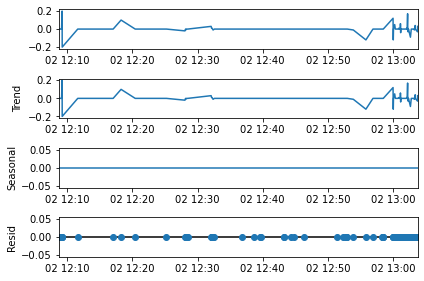

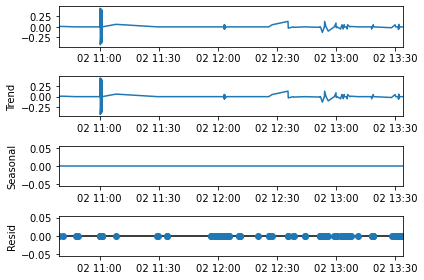

In [27]:

decomposition_y = sm.tsa.seasonal_decompose(y[:100], model='additive',freq=1)
fig = decomposition_y.plot()
decomposition_m = sm.tsa.seasonal_decompose(m[:100], model='additive',freq=1)
fig = decomposition_m.plot()
plt.show()

In [9]:
p = d = q = range(1, 5)
pdq = list(itertools.product(p, d, q))

In [11]:
PDQ={}
for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=(0,0,0,0),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            PDQ[(param)]='ARIMA{}x{}12 - AIC:{}'.format(param,(0,0,0,0) ,results.aic)
        except:
            continue

c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

In [12]:
PDQ

{(1, 1, 1): 'ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:-5065.291508369732',
 (1, 1, 2): 'ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:-4103.28516242372',
 (1, 1, 3): 'ARIMA(1, 1, 3)x(0, 0, 0, 0)12 - AIC:-4545.474771245519',
 (1, 1, 4): 'ARIMA(1, 1, 4)x(0, 0, 0, 0)12 - AIC:-5163.197897070231',
 (1, 2, 1): 'ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:-3502.6993715374874',
 (1, 2, 2): 'ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:-3009.350742407787',
 (1, 2, 3): 'ARIMA(1, 2, 3)x(0, 0, 0, 0)12 - AIC:-4257.7910138905445',
 (1, 2, 4): 'ARIMA(1, 2, 4)x(0, 0, 0, 0)12 - AIC:-4665.98599224891',
 (1, 3, 1): 'ARIMA(1, 3, 1)x(0, 0, 0, 0)12 - AIC:-2306.3745753621815',
 (1, 3, 2): 'ARIMA(1, 3, 2)x(0, 0, 0, 0)12 - AIC:-3118.3280327878347',
 (1, 3, 3): 'ARIMA(1, 3, 3)x(0, 0, 0, 0)12 - AIC:-3155.229914507144',
 (1, 3, 4): 'ARIMA(1, 3, 4)x(0, 0, 0, 0)12 - AIC:-3299.894934091953',
 (1, 4, 1): 'ARIMA(1, 4, 1)x(0, 0, 0, 0)12 - AIC:-62.25332794997007',
 (1, 4, 2): 'ARIMA(1, 4, 2)x(0, 0, 0, 0)12 - AIC:-2588.373010559932',
 (1, 4, 3): 'ARIMA

In [17]:
param=min(PDQ)
param

(1, 1, 1)

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\thiba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


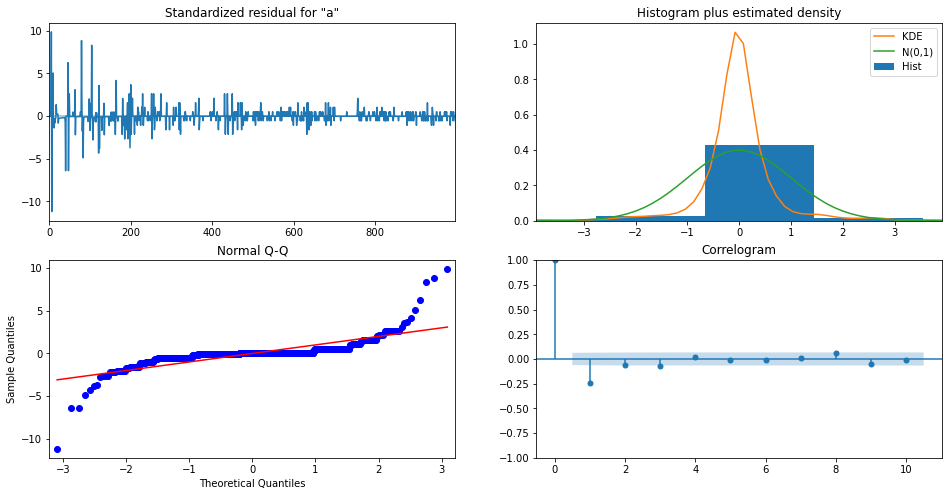

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [43]:
# pred = results.get_prediction(start='2008-01-02',dynamic=False)

pred=results.predict(t)
# pred_ci = pred.conf_int()
pred[:,0]
# print(pred.conf_int)

plt.plot(t,pred)
plt.plot(t,y[2000:2400])
# plt.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'